<a href="https://colab.research.google.com/github/islam-mirajul/Name-Based-Community-Prediction/blob/main/Community-Prediction(First_Name).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import unicodedata

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Religion-prediction_first-name_.csv',error_bad_lines=False)
df

,FirstName,Religion
0,মোঃ জাকির,ইসলাম
1,মোস্তফা,ইসলাম
2,মারিয়া,ইসলাম
3,আকাশ,হিন্দু
4,আনি বাবলু,বৌদ্ধ
...,...,...
8225,হোমিউন,ইসলাম
8226,হোসেন,ইসলাম
8227,হ্যান্ডরি,খ্রিষ্টান
8228,হ্যাপি,খ্রিষ্টান


In [ ]:
df.isnull().sum()

FirstName    0
Religion     0
dtype: int64

In [ ]:
df['Religion'].value_counts()

ইসলাম        2118
খ্রিষ্টান    2106
হিন্দু       2014
বৌদ্ধ        1992
Name: Religion, dtype: int64

In [ ]:
df['Religion'].unique()

array(['ইসলাম', 'হিন্দু', 'বৌদ্ধ', 'খ্রিষ্টান'], dtype=object)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2439 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2494 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2478 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2454 missing from current font.
  font.set_text(s

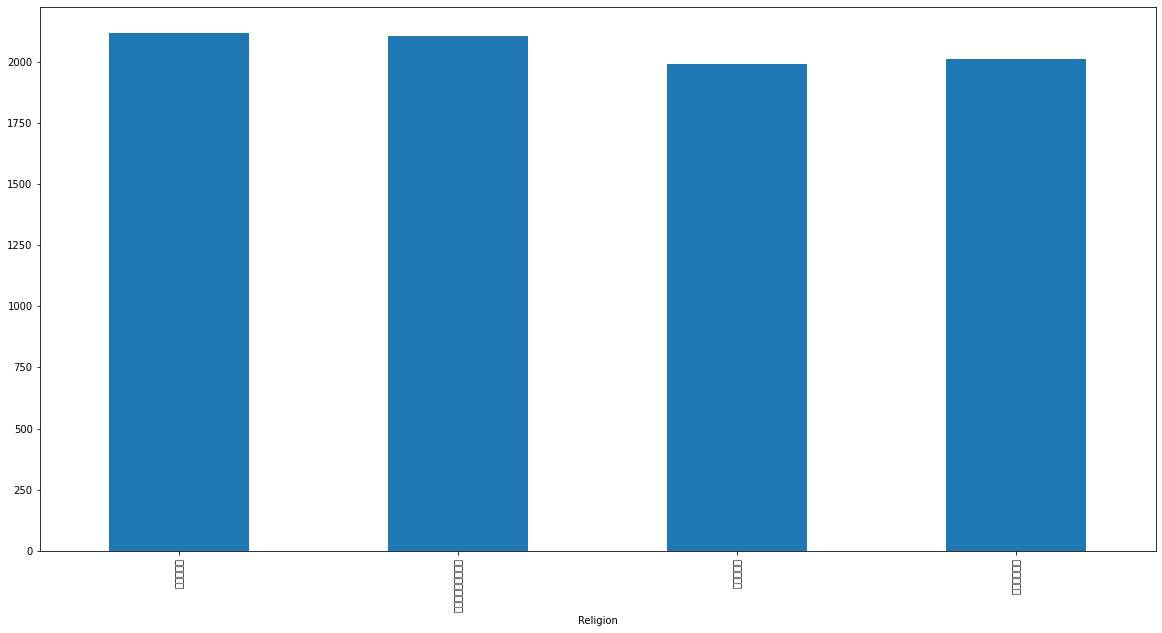

In [ ]:
df.groupby("Religion")['FirstName'].size().plot(kind='bar',figsize=(20,10))

In [ ]:
from sklearn.model_selection import train_test_split

X = df['FirstName']  # this time we want to look at the text
y = df['Religion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(6584, 625)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(6584, 625)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(6584, 625)

In [ ]:
 y_test.shape, X_test.shape,X_train.shape,y_train.shape

((1646,), (1646,), (6584,), (6584,))

In [ ]:

from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

[[230 181  12  18]
 [ 26 344  20  35]
 [ 29 214  94  47]
 [ 22 177  33 164]]


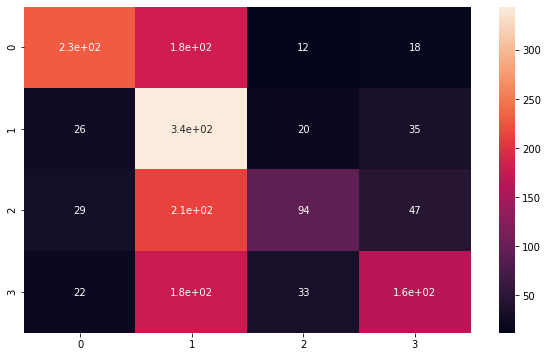

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.75      0.52      0.61       441
   খ্রিষ্টান       0.38      0.81      0.51       425
       বৌদ্ধ       0.59      0.24      0.35       384
      হিন্দু       0.62      0.41      0.50       396

    accuracy                           0.51      1646
   macro avg       0.58      0.50      0.49      1646
weighted avg       0.59      0.51      0.50      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.5054678007290401


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train_tfidf,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,

[[380  29  21  11]
 [209 144  46  26]
 [213  50  85  36]
 [180  48  66 102]]


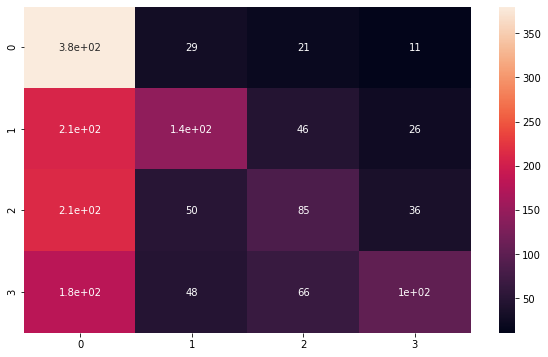

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.39      0.86      0.53       441
   খ্রিষ্টান       0.53      0.34      0.41       425
       বৌদ্ধ       0.39      0.22      0.28       384
      হিন্দু       0.58      0.26      0.36       396

    accuracy                           0.43      1646
   macro avg       0.47      0.42      0.40      1646
weighted avg       0.47      0.43      0.40      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.43195625759416767


In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_tfidf,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', SVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', deg

[[233 177  13  18]
 [ 21 353  20  31]
 [ 22 215 100  47]
 [ 19 186  22 169]]


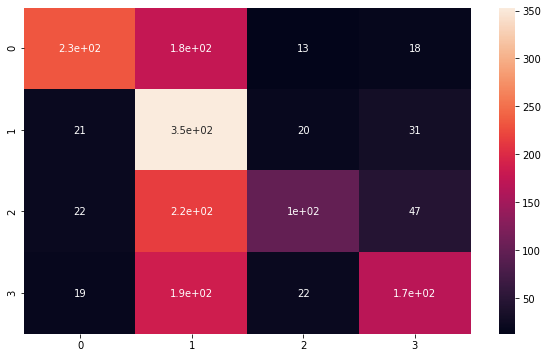

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.79      0.53      0.63       441
   খ্রিষ্টান       0.38      0.83      0.52       425
       বৌদ্ধ       0.65      0.26      0.37       384
      হিন্দু       0.64      0.43      0.51       396

    accuracy                           0.52      1646
   macro avg       0.61      0.51      0.51      1646
weighted avg       0.61      0.52      0.51      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.5194410692588093


In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_tfidf,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling

[[227  23  12 179]
 [ 27 160  21 217]
 [ 24  34  95 231]
 [ 21  32  33 310]]


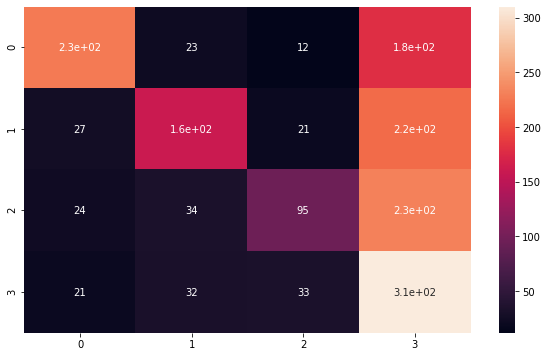

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.76      0.51      0.61       441
   খ্রিষ্টান       0.64      0.38      0.47       425
       বৌদ্ধ       0.59      0.25      0.35       384
      হিন্দু       0.33      0.78      0.47       396

    accuracy                           0.48      1646
   macro avg       0.58      0.48      0.48      1646
weighted avg       0.59      0.48      0.48      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.48116646415552855


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_tfidf,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',RandomForestClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)

[[235 176  10  20]
 [ 22 351  20  32]
 [ 26 214  99  45]
 [ 19 182  22 173]]


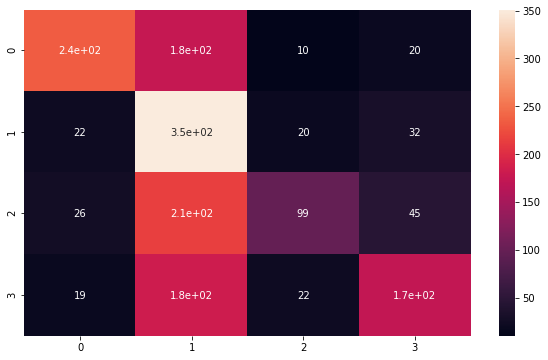

In [ ]:
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.78      0.53      0.63       441
   খ্রিষ্টান       0.38      0.83      0.52       425
       বৌদ্ধ       0.66      0.26      0.37       384
      হিন্দু       0.64      0.44      0.52       396

    accuracy                           0.52      1646
   macro avg       0.61      0.51      0.51      1646
weighted avg       0.61      0.52      0.52      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.5212636695018226


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_tfidf,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',DecisionTreeClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
               

[[239 176   9  17]
 [ 20 358  17  30]
 [ 28 214  97  45]
 [ 20 185  19 172]]


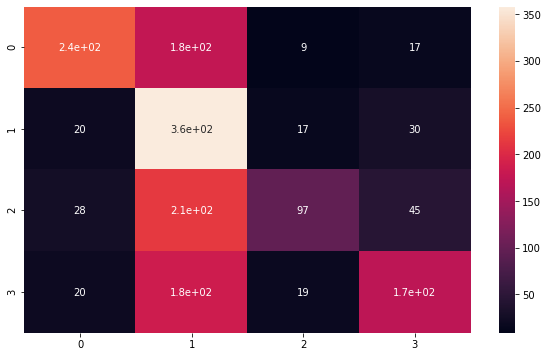

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.78      0.54      0.64       441
   খ্রিষ্টান       0.38      0.84      0.53       425
       বৌদ্ধ       0.68      0.25      0.37       384
      হিন্দু       0.65      0.43      0.52       396

    accuracy                           0.53      1646
   macro avg       0.62      0.52      0.51      1646
weighted avg       0.62      0.53      0.52      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.5261239368165249


In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(X_train_tfidf,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',SGDClassifier()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

[[395  21  12  13]
 [206 155  23  41]
 [214  35  94  41]
 [173  34  29 160]]


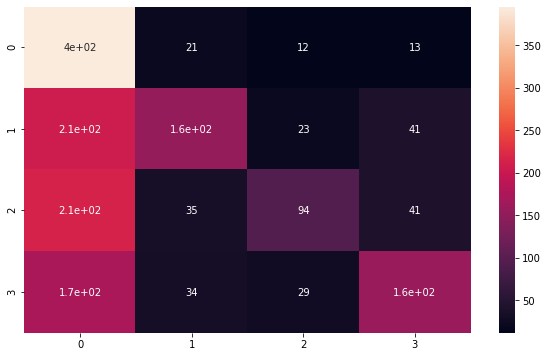

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.40      0.90      0.55       441
   খ্রিষ্টান       0.63      0.36      0.46       425
       বৌদ্ধ       0.59      0.24      0.35       384
      হিন্দু       0.63      0.40      0.49       396

    accuracy                           0.49      1646
   macro avg       0.56      0.48      0.46      1646
weighted avg       0.56      0.49      0.47      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.488456865127582


In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_tfidf,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
from sklearn.pipeline import Pipeline

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf',MultinomialNB()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

[[229 183  12  17]
 [ 25 347  21  32]
 [ 22 218  90  54]
 [ 15 181  36 164]]


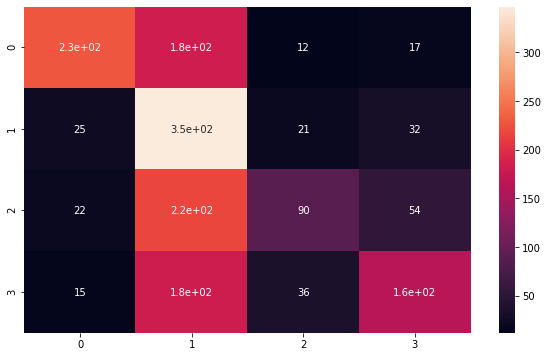

In [ ]:
# Form a prediction set
predictions = text_clf.predict(X_test)
# Report the confusion matrix
from sklearn import metrics
cf_matrix=metrics.confusion_matrix(y_test,predictions)
print(cf_matrix)
plt.figure(figsize=(10,6))  
sns.heatmap(cf_matrix, annot=True )

In [ ]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

       ইসলাম       0.79      0.52      0.63       441
   খ্রিষ্টান       0.37      0.82      0.51       425
       বৌদ্ধ       0.57      0.23      0.33       384
      হিন্দু       0.61      0.41      0.49       396

    accuracy                           0.50      1646
   macro avg       0.59      0.50      0.49      1646
weighted avg       0.59      0.50      0.50      1646



In [ ]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.5042527339003645
